<a href="https://colab.research.google.com/github/Manohar1805/walkrun_LSTM/blob/main/walkorrun_LSTM05_29_submitted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project-PRCP-1013-WalkRunClass

#Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

Multi-layer neural networks will be trained and evaluated based on data from Run or Walk Reduced dataset.

##Attribute Information:
The dataset comprises the readings of motion sensors recorded while users executed typical daily activities. The detailed format is described in the package. The attributes correspond to raw sensor readings. There are a total of 11 attributes.

1.date -date of the activity

2.time - time of activity

3.username - name of the person

4.wrist - left or right wrist

5.activity - walking or running activity - 0 - walking, 1-running

6.acceleration_x - represents accelaration along x-axis

7.acceleration_y - represents accelaration along y-axis

8.acceleration_z - represents accelaration along z-axis

9.gyro_x

10.gyro_y

11.gyro_z

#importing required libreries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as  dt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU

##downloading the dataset in zip format

In [ ]:
!wget https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1013-WalkRunClass.zip

--2023-05-29 14:02:29--  https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1013-WalkRunClass.zip
Resolving d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)... 99.84.170.14, 99.84.170.158, 99.84.170.128, ...
Connecting to d3ilbtxij3aepc.cloudfront.net (d3ilbtxij3aepc.cloudfront.net)|99.84.170.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302449 (2.2M) [application/x-zip-compressed]
Saving to: ‘PRCP-1013-WalkRunClass.zip.1’

PRCP-1013-WalkRunCl 100%[===================>]   2.20M  --.-KB/s    in 0.06s   

2023-05-29 14:02:30 (34.3 MB/s) - ‘PRCP-1013-WalkRunClass.zip.1’ saved [2302449/2302449]



##extracting the data from  zipfile

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/PRCP-1013-WalkRunClass.zip') #colab path
zip_ref.extractall()
zip_ref.close()

##reading the file using pandas

In [ ]:
df=pd.read_csv('/content/Data/walkrun.csv')

In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


##Extracting usefull information



* as you can see the date and time  is in  the object form, so coverting the data and time to datetime dtype and extract the required information such as day,month,hour,minute


*   as the year column as only one unique column i.e 2017 not extracting that column




In [ ]:
df['time_con']=pd.to_datetime(df['time'],format='%H:%M:%S:%f')

In [ ]:
df['hour']=df['time_con'].dt.hour
df['minute']=df['time_con'].dt.minute
df['second']=df['time_con'].dt.second

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['nthday']=df['date'].dt.dayofweek

In [ ]:
df['dayofweek']=df['date'].dt.day_name()

In [ ]:
df['day']=df['date'].dt.day

In [ ]:
df['Month']=df['date'].dt.month

##head after extraction
head of dataframe after extracting the required information from date and time columns

In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


#univariant analysis

<Axes: xlabel='hour', ylabel='count'>

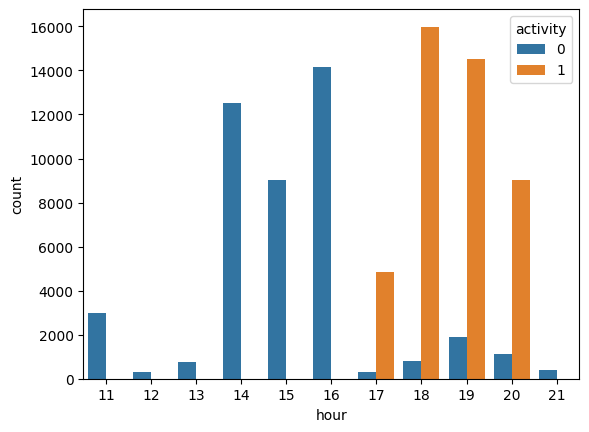

In [ ]:
sns.countplot(x=df['hour'],hue=df['activity'])

##insight 1

as the day contains 24 hours x-axis representing the hour of a day and plot of the activity over the day representing



*   from 11 o'clock to 4 o'clock viktor is invovled in walking and no running activity is found



*   after 4 o'clock viktor is useally running as all the persons do in their day to day life just like jogging and less amount of walking is found in the evening compared to running







<Axes: xlabel='minute', ylabel='count'>

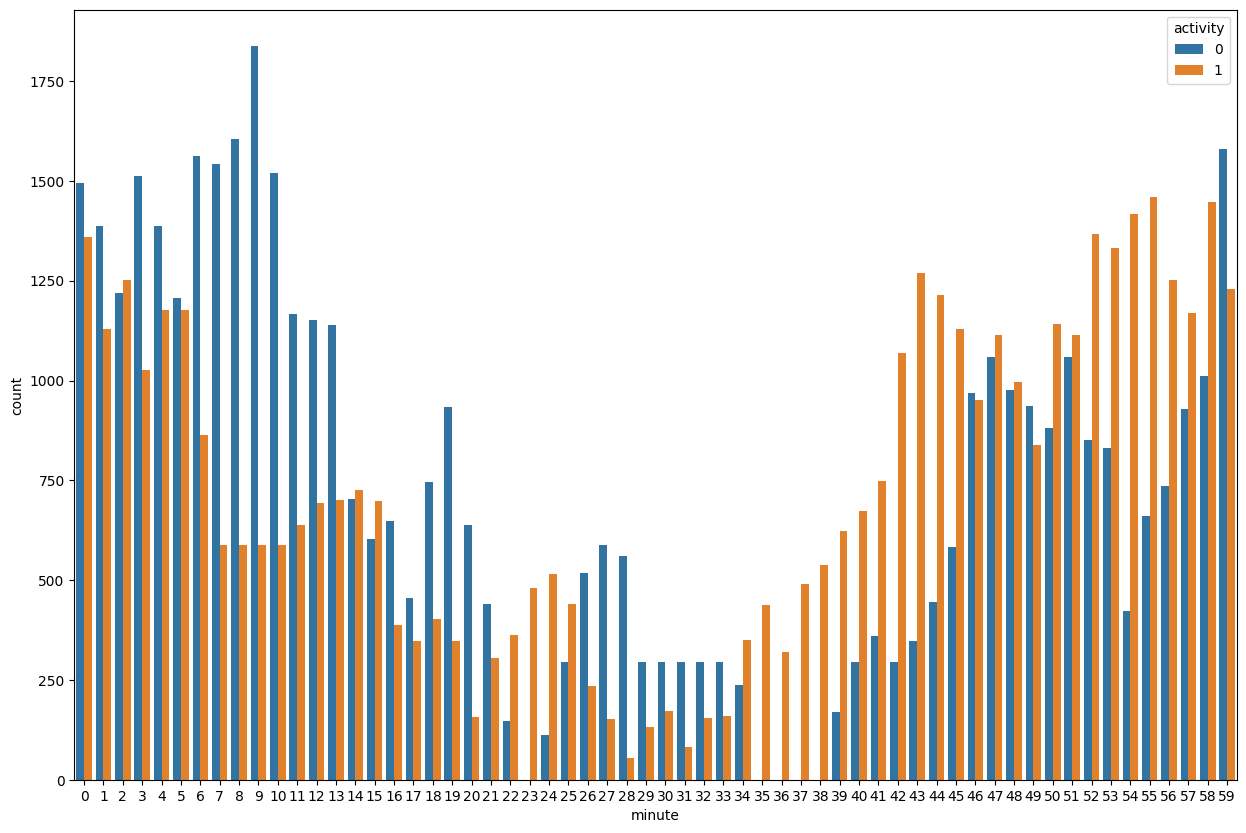

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['minute'],hue=df['activity'])

<Axes: xlabel='second', ylabel='count'>

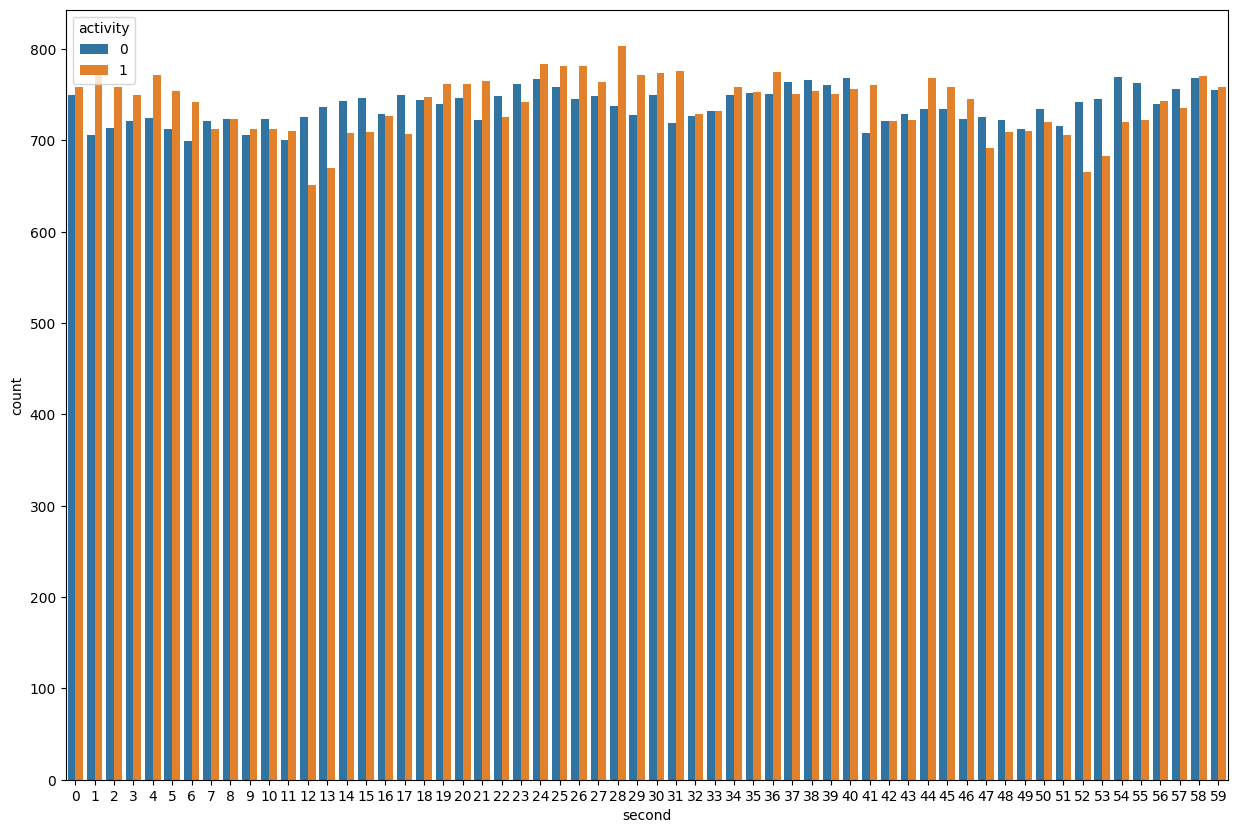

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['second'],hue=df['activity'])

##insight 2

looking at the minute and second columns both the acitvites found to be in the similar and no such meaning full information can found after simply visualizing the graphs of these 2

<Axes: xlabel='dayofweek', ylabel='count'>

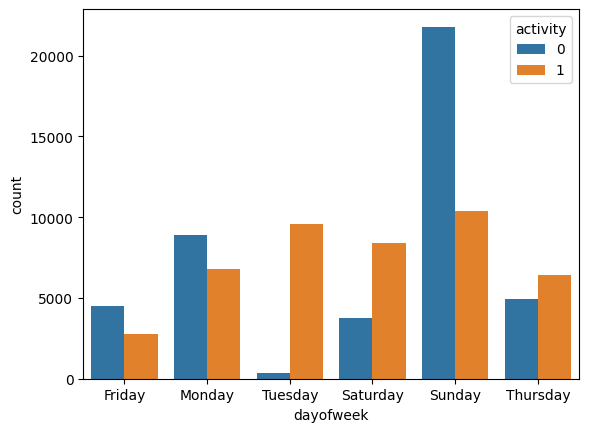

In [ ]:
sns.countplot(x=df['dayofweek'],hue=df['activity'])

##insight 3


*  in all the days of week viktor is running and walking with similar state


*  activity of viktor on sunday is more comparred to weekdays and it is a weekend




In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


<Axes: xlabel='day', ylabel='count'>

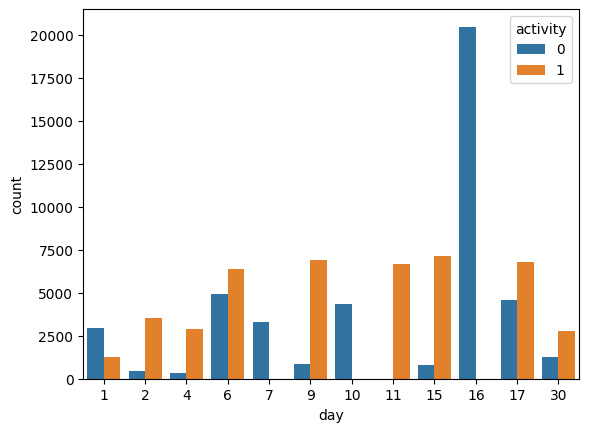

In [ ]:
sns.countplot(x=df['day'],hue=df['activity'])

<Axes: >

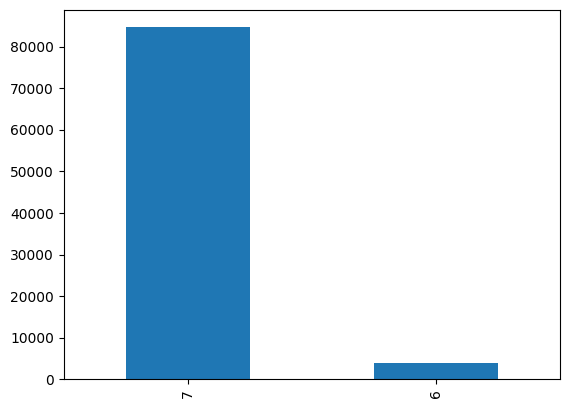

In [ ]:
df['Month'].value_counts().plot(kind='bar')

##insight 3
most of the data is taken in 7th month and only few records are from 6th month

##segregation of walking and running datasets

activity -
0- walking
1- running

as the activity telling that 0 is walking category and 1 is running category extarcting the data in the form of running and walking and visualizing the these 2 seperate data using subplots

In [ ]:
run=df.loc[df['activity']==1]

In [ ]:
run.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
755,2017-06-30,20:33:44:257565021,viktor,0,1,1.2842,0.0526,-0.2362,-1.9543,2.4977,1.3038,1900-01-01 20:33:44.257565021,20,33,44,4,Friday,30,6
756,2017-06-30,20:33:44:457401990,viktor,0,1,0.3057,0.4504,-0.1000,1.4730,-0.5391,-2.6030,1900-01-01 20:33:44.457401990,20,33,44,4,Friday,30,6
757,2017-06-30,20:33:44:658038020,viktor,0,1,1.0601,-0.9857,-0.0732,1.4300,-0.9917,-2.3499,1900-01-01 20:33:44.658038020,20,33,44,4,Friday,30,6
758,2017-06-30,20:33:44:858160972,viktor,0,1,-0.1065,-0.7203,0.2003,-0.4013,0.4240,3.0591,1900-01-01 20:33:44.858160972,20,33,44,4,Friday,30,6
759,2017-06-30,20:33:45:57991981,viktor,0,1,1.0069,0.3441,-0.2760,-1.6086,2.3222,1.4736,1900-01-01 20:33:45.579919810,20,33,45,4,Friday,30,6


In [ ]:
walk=df.loc[df['activity']==0]

In [ ]:
walk.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


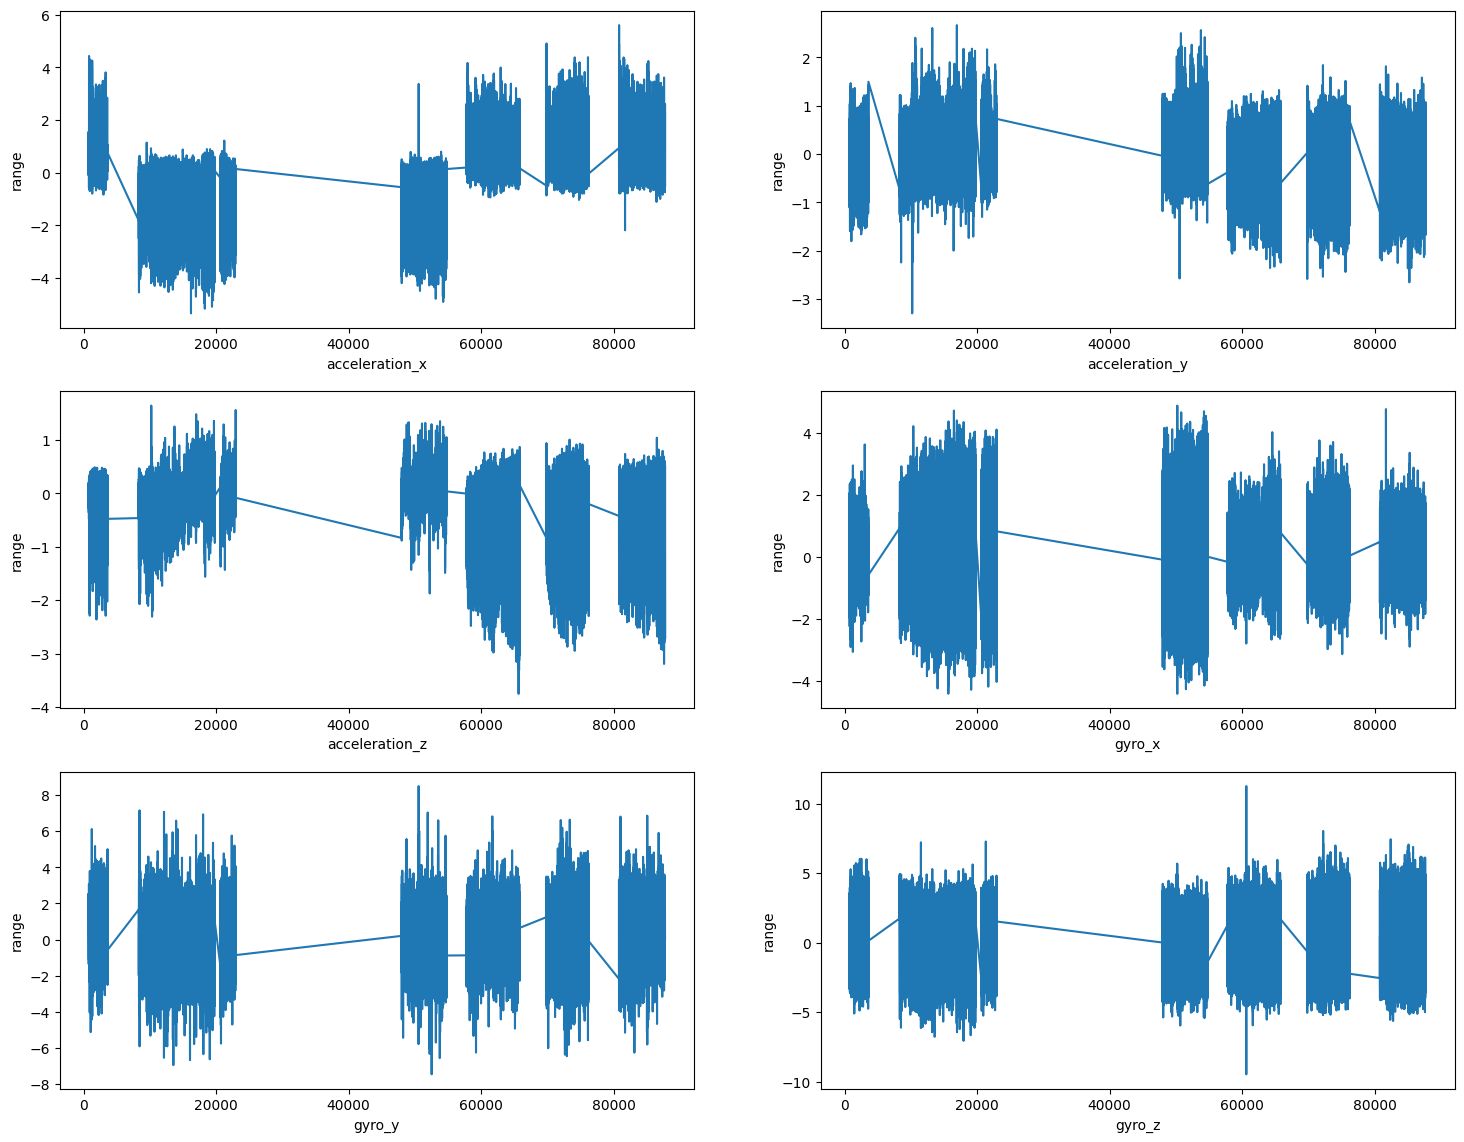

In [ ]:
pl_no=1
plt.figure(figsize=(18,14))
for column in run.columns[5:11]:
    plt.subplot(3,2,pl_no)
    sns.lineplot(run[column])
    plt.xlabel(column)
    plt.ylabel("range")
    pl_no+=1
plt.show()

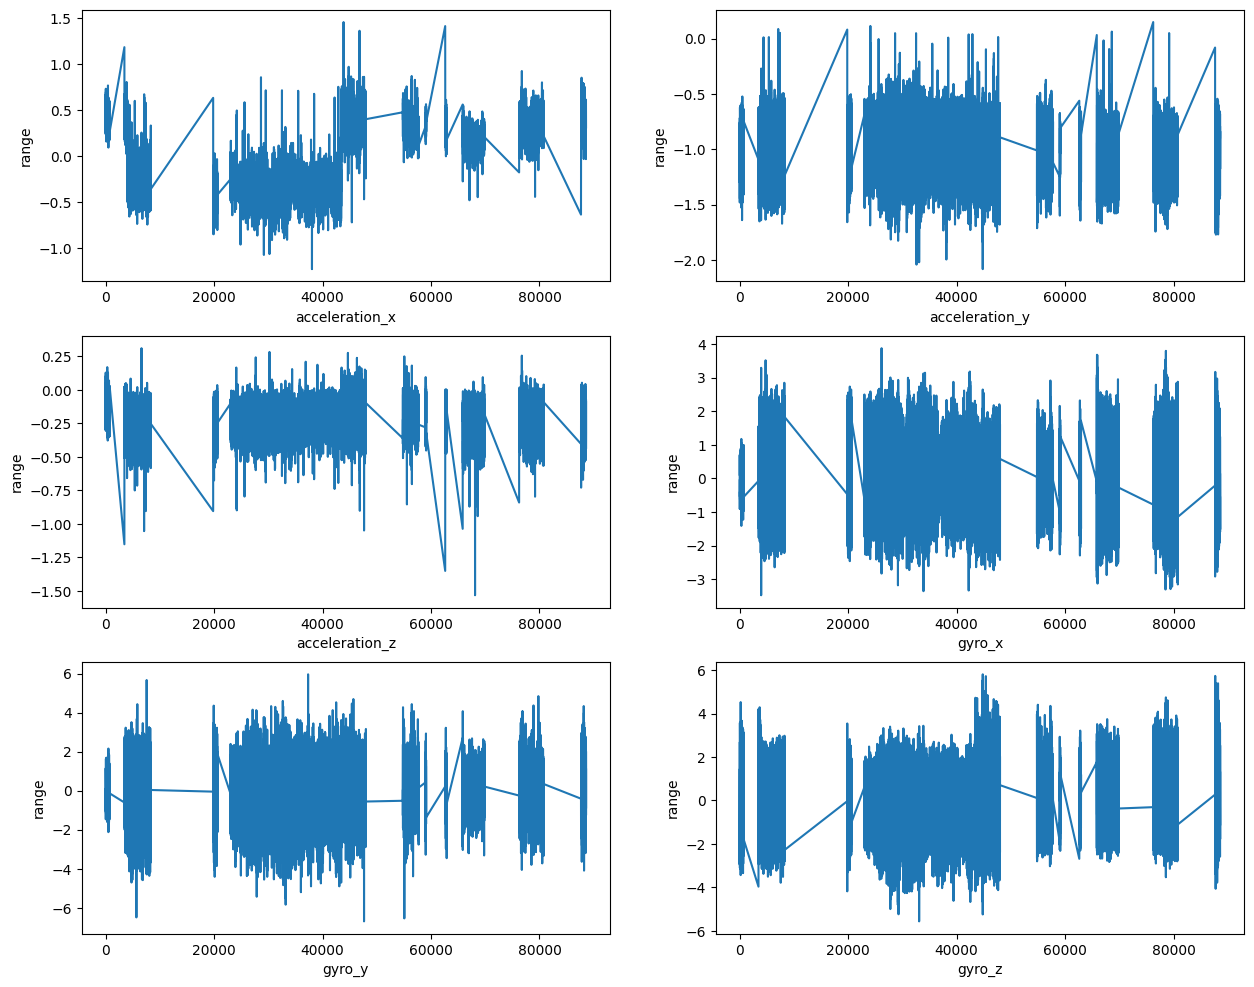

In [ ]:
pl_no=1
plt.figure(figsize=(15,12))
for column in walk.columns[5:11]:
    plt.subplot(3,2,pl_no)
    sns.lineplot(walk[column])
    plt.xlabel(column)
    plt.ylabel("range")
    pl_no+=1
plt.show()

##insight 4



*  accelaration-x - accelaration of the person while running is in the range of -4 to  6 where as the accelaration of person while walking is the range of -1 to 1.5

*  accelaration-y - while running the rage is in between -3 to 2 where as while walking the range -2 to 0 only

*  accelaration-z - while running the accelaration is ranging between -4 to 1 where as while walking this is range is -1.25 to 0.25 only


*  but gyro of person is alomost similar no matter he is walking or running. all the values have similar range.

#bivariant analysis

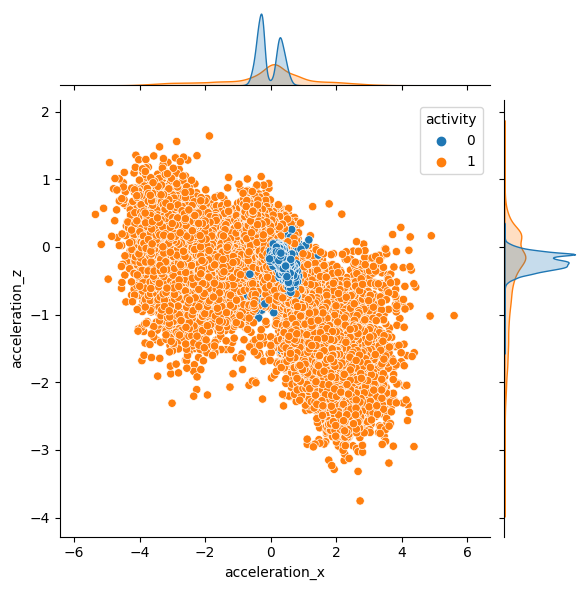

In [ ]:
sns.jointplot(y=df.acceleration_z,x=df['acceleration_x'],hue=df.activity)

##insight 5

* as the accelaration of viktor along x axis is increasing the accelaration along z axis is decreasing

* and as the accelaration of of viktor while walking is less so the walking points are alomost concetrated at the center and the datapoints while running is more widely spread and it has more range

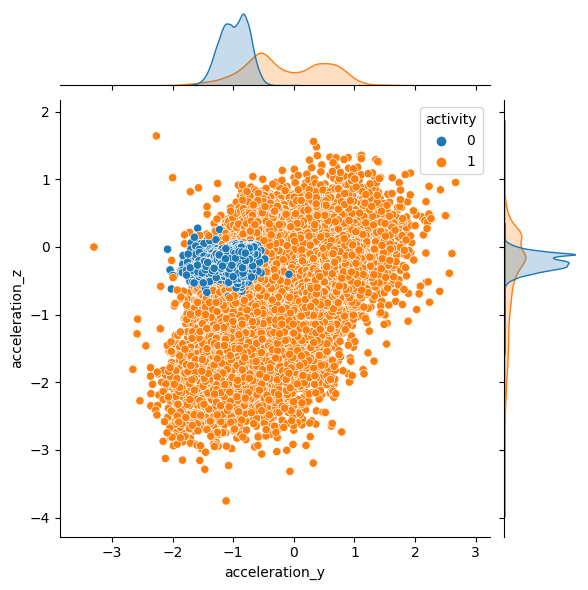

In [ ]:
sns.jointplot(y=df.acceleration_z,x=df['acceleration_y'],hue=df.activity)

##insight 6

* as the accelaration of viktor along y axis is increasing the accelaration along z axis is also increasing  indicating the linear relationship

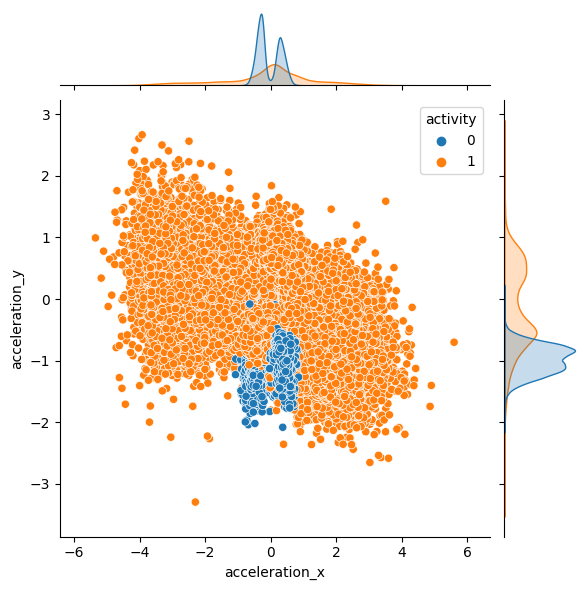

In [ ]:
sns.jointplot(x=df.acceleration_x,y=df['acceleration_y'],hue=df.activity)

##insight 7

as the accelaration along x axis is increasing the accelaration along y axis is decreasing and are inversly proportional

In [ ]:
# sns.pairplot(df[df.columns[5:11]])

In [ ]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time_con,hour,minute,second,nthday,dayofweek,day,Month
0,2017-06-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,1900-01-01 13:51:15.847724020,13,51,15,4,Friday,30,6
1,2017-06-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1900-01-01 13:51:16.246945023,13,51,16,4,Friday,30,6
2,2017-06-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1900-01-01 13:51:16.446233987,13,51,16,4,Friday,30,6
3,2017-06-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,1900-01-01 13:51:16.646117985,13,51,16,4,Friday,30,6
4,2017-06-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1900-01-01 13:51:16.846738994,13,51,16,4,Friday,30,6


#dropping unneccesory columns - feature selection

In [ ]:
df.drop(['date','time','username','wrist','time_con','dayofweek','day','Month'],axis=1,inplace=True)

In [ ]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,13,51,15,4
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,13,51,16,4
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,13,51,16,4
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,13,51,16,4
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,13,51,16,4


#cyclic information

as the columns hour,minute,second and nthday represents are in the cyclic manner by nature transforming these columns using sin function

In [ ]:
cyclic_cols=['hour','minute','second','nthday']

for i in cyclic_cols:
  df[i]=np.sin(df[i])

#train test splits

considering 80% of data as training data will be using 20% data as testing data .

following manual method to avoid psudo splitting and avoid shuffling of data

In [ ]:
train_size=int(len(df)*0.8)
train_df=df[:train_size] # 80% data is training data
test_df=df[train_size:]  #20% data is testing data

#scaling

* using min max scaler to conver the values between 0 and 1.
* as we are plannig to  LSTM model , the values between 0 to 1 will be better compared to the values having negative values.

bcs LSTM cell will as the tanh fucntion in its architechture



In [ ]:
scaler=MinMaxScaler()  # initiating minmax scaler

In [ ]:
X_train=train_df.drop('activity',axis=1)
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.420167,0.670229,0.650288,-0.756802
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.420167,0.670229,-0.287903,-0.756802
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.420167,0.670229,-0.287903,-0.756802
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.420167,0.670229,-0.287903,-0.756802
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.420167,0.670229,-0.287903,-0.756802


In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_train.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.420167,0.670229,0.650288,-0.756802
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0.420167,0.670229,-0.287903,-0.756802
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0.420167,0.670229,-0.287903,-0.756802
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.420167,0.670229,-0.287903,-0.756802
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0.420167,0.670229,-0.287903,-0.756802


In [ ]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.547464,0.421921,0.694500,0.469822,0.469670,0.315740,0.707767,0.835151,0.825179,0.112265
1,0.587162,0.364622,0.652454,0.457280,0.468937,0.463068,0.707767,0.835151,0.356061,0.112265
2,0.564515,0.304558,0.709293,0.378310,0.474293,0.339498,0.707767,0.835151,0.356061,0.112265
3,0.551178,0.416709,0.712371,0.489049,0.441955,0.315547,0.707767,0.835151,0.356061,0.112265
4,0.568561,0.396816,0.702564,0.481827,0.495067,0.577079,0.707767,0.835151,0.356061,0.112265


In [ ]:
y_train=train_df['activity']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

In [ ]:
X_test=test_df.drop('activity',axis=1)
X_test.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
70870,0.6975,0.7000,-0.5526,-0.8437,0.0453,-0.6307,-0.750987,-0.916522,0.000000,0.14112
70871,2.1604,-0.7054,-1.7276,-0.1344,-1.2329,-3.8290,-0.750987,-0.916522,0.841471,0.14112
70872,-0.1945,-0.4005,0.2431,1.5492,0.5895,1.3939,-0.750987,-0.916522,0.841471,0.14112
70873,1.2948,-1.1655,-1.4757,0.5115,-0.2046,2.2225,-0.750987,-0.916522,0.841471,0.14112
70874,0.4646,0.5443,-0.5110,-1.1969,0.6328,-1.1749,-0.750987,-0.916522,0.841471,0.14112


In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled_df.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,hour,minute,second,nthday
0,0.589629,0.670186,0.593463,0.385489,0.470472,0.426550,0.107792,0.041736,0.500020,0.611002
1,0.732249,0.434657,0.375633,0.461719,0.390398,0.272387,0.107792,0.041736,0.920776,0.611002
2,0.502666,0.485755,0.740976,0.642658,0.504564,0.524139,0.107792,0.041736,0.920776,0.611002
3,0.647861,0.357550,0.422332,0.531134,0.454817,0.564079,0.107792,0.041736,0.920776,0.611002
4,0.566923,0.644093,0.601175,0.347530,0.507276,0.400319,0.107792,0.041736,0.920776,0.611002


In [ ]:
y_test=test_df['activity']
y_test.head()

70870    1
70871    1
70872    1
70873    1
70874    1
Name: activity, dtype: int64

#values into arrays

converting the values into arrays for faster  computation

In [ ]:
X_train,y_train=np.array(X_train_scaled_df),np.array(y_train)
X_test,y_test=np.array(X_test_scaled_df),np.array(y_test)

#converting data into windows

as the LSTM model requires the data to be in 3d format in first stage converting the data into windows and specific target labels.

the windowed data allow our model to learn in better manner considering the previous inputs

In [ ]:
window_size = 6

# Create empty lists to store the generated sequences#
train_X = []
train_y = []

# Generate the sequences using sliding window
for i in range(len(X_train) - window_size + 1):
    window_data = X_train[i:i+window_size]
    target = y_train[i+window_size-1]
    train_X.append(window_data)
    train_y.append(target)

In [ ]:
train_X[0]

array([[0.54746376, 0.42192056, 0.69449955, 0.46982203, 0.46966992,
        0.31573975, 0.70776696, 0.83515059, 0.82517943, 0.11226523],
       [0.58716231, 0.36462209, 0.65245361, 0.45728011, 0.46893696,
        0.46306794, 0.70776696, 0.83515059, 0.35606088, 0.11226523],
       [0.56451503, 0.3045584 , 0.70929349, 0.37831012, 0.4742932 ,
        0.33949832, 0.70776696, 0.83515059, 0.35606088, 0.11226523],
       [0.55117819, 0.41670856, 0.71237092, 0.48904866, 0.44195531,
        0.31554694, 0.70776696, 0.83515059, 0.35606088, 0.11226523],
       [0.56856093, 0.39681582, 0.70256391, 0.48182658, 0.49506662,
        0.57707918, 0.70776696, 0.83515059, 0.35606088, 0.11226523],
       [0.56105408, 0.41786492, 0.67818542, 0.55058679, 0.45398335,
        0.58107027, 0.70776696, 0.83515059, 0.0192973 , 0.11226523]])

In [ ]:
train_y[0]

0

In [ ]:
train_X,train_y=np.array(train_X),np.array(train_y)

In [ ]:
window_size = 6

# Create empty lists to store the generated sequences
test_X = []
test_y = []

# Generate the sequences using sliding window
for i in range(len(X_test) - window_size + 1):
    window_data = X_test[i:i+window_size]
    target = y_test[i+window_size-1]
    test_X.append(window_data)
    test_y.append(target)

In [ ]:
test_X,test_y=np.array(test_X),np.array(test_y)

#3d data formation

*converting the training and testing data into 3d formates to using them in LSTM model

In [ ]:
train_X = train_X.reshape(train_X.shape[0], window_size, train_X.shape[2])

In [ ]:
test_X = test_X.reshape(test_X.shape[0], window_size, test_X.shape[2])

In [ ]:
train_X.shape

(70865, 6, 10)

In [ ]:
test_X.shape

(17713, 6, 10)

#Model creation

##model 1

using single lstm layer for classification

In [ ]:
model1=Sequential()

In [ ]:
model1.add(LSTM(units=64, input_shape=(window_size, 10)))
model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history1=model1.fit(train_X,train_y,epochs=10,batch_size=32)

Epoch 1/10
2215/2215 [==============================] - 12s 4ms/step - loss: 0.0516 - accuracy: 0.9805
Epoch 2/10
2215/2215 [==============================] - 11s 5ms/step - loss: 0.0166 - accuracy: 0.9966
Epoch 3/10
2215/2215 [==============================] - 12s 5ms/step - loss: 0.0147 - accuracy: 0.9970
Epoch 4/10
2215/2215 [==============================] - 12s 5ms/step - loss: 0.0136 - accuracy: 0.9972
Epoch 5/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0126 - accuracy: 0.9976
Epoch 6/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0123 - accuracy: 0.9973
Epoch 7/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0114 - accuracy: 0.9977
Epoch 8/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0108 - accuracy: 0.9976
Epoch 9/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 10/10
2215/2215 [==============================] - 10s 4ms/step - lo

In [ ]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                19200     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,265
Trainable params: 19,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']

  accuracy = history.history['accuracy']


  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

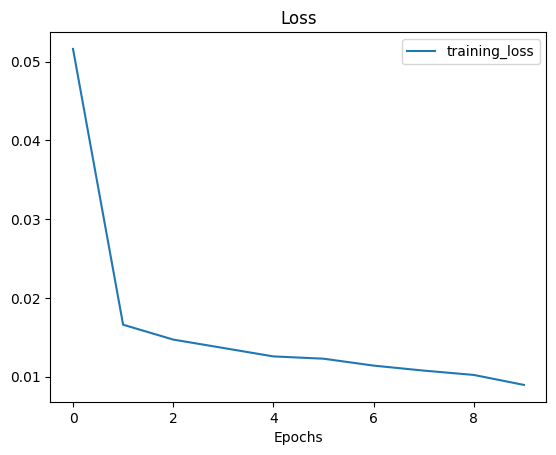

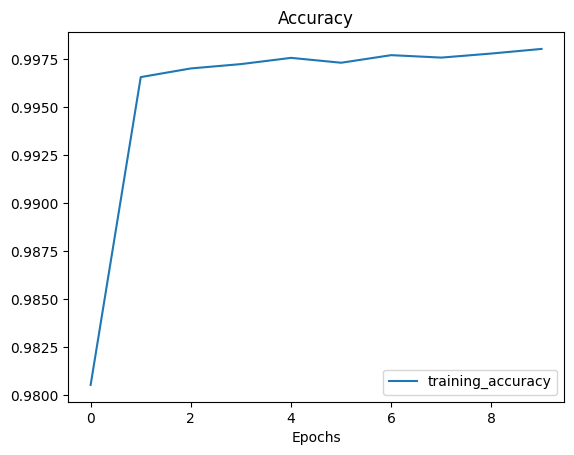

In [ ]:
plot_loss_curves(history1)

In [ ]:
model1_pred=model1.predict(test_X)

554/554 [==============================] - 2s 2ms/step


In [ ]:
model1_pred

array([[9.9148983e-01],
       [9.8891407e-01],
       [9.8980474e-01],
       ...,
       [7.3598079e-05],
       [7.9942038e-05],
       [1.3319349e-04]], dtype=float32)

In [ ]:
model1_pred.shape

(17713, 1)

In [ ]:
pred=np.where(model1_pred<0.5,0,1)

In [ ]:
pred.shape

(17713, 1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test[5:],pred))

[[ 5424    12]
 [   46 12231]]


In [ ]:
print(classification_report(y_test[5:],pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5436
           1       1.00      1.00      1.00     12277

    accuracy                           1.00     17713
   macro avg       1.00      1.00      1.00     17713
weighted avg       1.00      1.00      1.00     17713



##model 2

GRU is another type of lstm model and it as faster computation startegy compared to normal LSTM model.

In [ ]:
#model creation
model2=Sequential()

#adding layers to model2
model2.add(GRU(units=64, input_shape=(window_size, 10)))
model2.add(Dense(units=1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#fitting the model
history2=model2.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting on the test data
model2_pred=model2.predict(test_X)

#segregating into classes
pred2=np.where(model2_pred>0.5,1,0)

#printing the the matrics
print("\n")
print("metrics on test data")
print(confusion_matrix(y_test[5:],pred2))
print('\n')
print(classification_report(y_test[5:],pred2))

Epoch 1/10
2215/2215 [==============================] - 16s 6ms/step - loss: 0.0550 - accuracy: 0.9769
Epoch 2/10
2215/2215 [==============================] - 11s 5ms/step - loss: 0.0159 - accuracy: 0.9967
Epoch 3/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0128 - accuracy: 0.9972
Epoch 4/10
2215/2215 [==============================] - 12s 6ms/step - loss: 0.0118 - accuracy: 0.9975
Epoch 5/10
2215/2215 [==============================] - 9s 4ms/step - loss: 0.0105 - accuracy: 0.9978
Epoch 6/10
2215/2215 [==============================] - 10s 4ms/step - loss: 0.0096 - accuracy: 0.9978
Epoch 7/10
2215/2215 [==============================] - 12s 5ms/step - loss: 0.0083 - accuracy: 0.9981
Epoch 8/10
2215/2215 [==============================] - 11s 5ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 9/10
2215/2215 [==============================] - 14s 6ms/step - loss: 0.0061 - accuracy: 0.9986
Epoch 10/10
554/554 [==============================] - 2s 2ms/step


metri

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 64)                14592     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,657
Trainable params: 14,657
Non-trainable params: 0
_________________________________________________________________


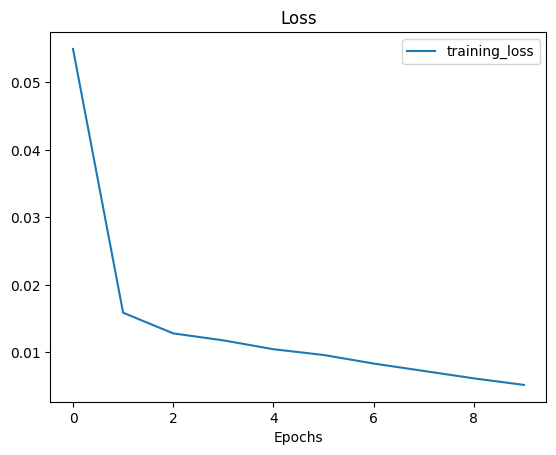

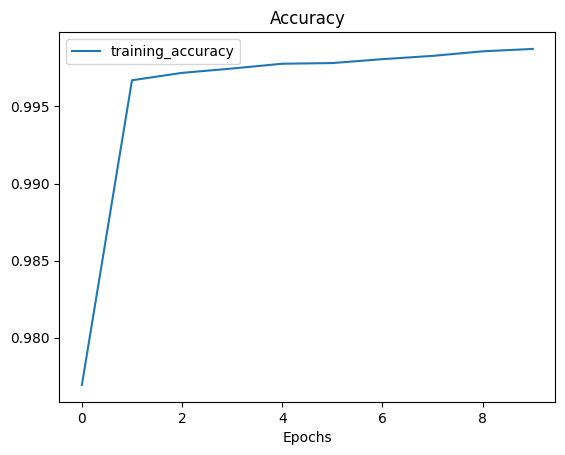

In [ ]:
plot_loss_curves(history2)

##model 3

model creation using multiple LSTM layers


In [ ]:
#multilayer model
model3=Sequential()

#adding multiple layers
model3.add(LSTM(units=128, input_shape=(window_size, 10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, input_shape=(window_size, 10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=32, input_shape=(window_size, 10),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(units=32, input_shape=(window_size, 10)))
model3.add(Dropout(0.2))
model3.add(Dense(units=1,activation='sigmoid'))

#compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#fitting the model
history3=model3.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting on the test data
model3_pred=model3.predict(test_X)

#segregating into classes
pred3=np.where(model3_pred>0.5,1,0)

print("\n")
print("metrics on test data")
print(confusion_matrix(y_test[5:],pred3))
print('\n')
print(classification_report(y_test[5:],pred3))

Epoch 1/10
2215/2215 [==============================] - 37s 12ms/step - loss: 0.0594 - accuracy: 0.9775
Epoch 2/10
2215/2215 [==============================] - 23s 11ms/step - loss: 0.0158 - accuracy: 0.9967
Epoch 3/10
2215/2215 [==============================] - 25s 11ms/step - loss: 0.0140 - accuracy: 0.9971
Epoch 4/10
2215/2215 [==============================] - 30s 13ms/step - loss: 0.0117 - accuracy: 0.9975
Epoch 5/10
2215/2215 [==============================] - 24s 11ms/step - loss: 0.0091 - accuracy: 0.9981
Epoch 6/10
2215/2215 [==============================] - 21s 9ms/step - loss: 0.0085 - accuracy: 0.9982
Epoch 7/10
2215/2215 [==============================] - 20s 9ms/step - loss: 0.0077 - accuracy: 0.9984
Epoch 8/10
2215/2215 [==============================] - 21s 9ms/step - loss: 0.0069 - accuracy: 0.9985
Epoch 9/10
2215/2215 [==============================] - 21s 10ms/step - loss: 0.0066 - accuracy: 0.9986
Epoch 10/10
554/554 [==============================] - 4s 4ms/step


In [ ]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 6, 128)            71168     
                                                                 
 dropout_8 (Dropout)         (None, 6, 128)            0         
                                                                 
 lstm_7 (LSTM)               (None, 6, 64)             49408     
                                                                 
 dropout_9 (Dropout)         (None, 6, 64)             0         
                                                                 
 lstm_8 (LSTM)               (None, 6, 32)             12416     
                                                                 
 dropout_10 (Dropout)        (None, 6, 32)             0         
                                                                 
 lstm_9 (LSTM)               (None, 32)               

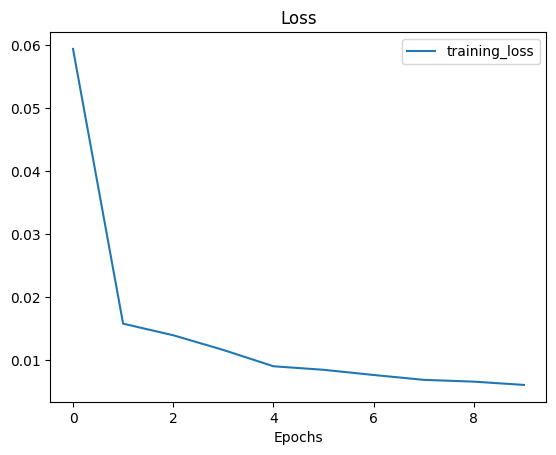

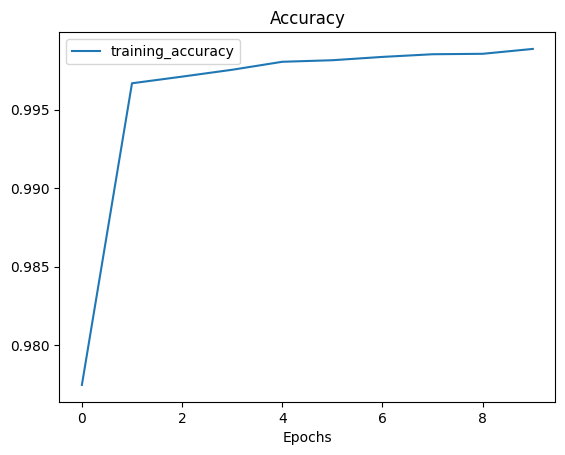

In [ ]:
plot_loss_curves(history3)

##Model 4

using multiple GRU layers

In [ ]:
#model creation
model4=Sequential()

#adding the multiple layers to model
model4.add(GRU(units=128, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=64, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=32, input_shape=(window_size, 10),return_sequences=True))
model4.add(Dropout(0.2))
model4.add(GRU(units=32, input_shape=(window_size, 10)))
model4.add(Dropout(0.2))
model4.add(Dense(units=1,activation='sigmoid'))

#compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

#fitting the model
history4=model4.fit(train_X,train_y,epochs=10,batch_size=32)

#predicting the model
model4_pred=model4.predict(test_X)

#segregating into classes
pred4=np.where(model4_pred>0.5,1,0)

#metrics on test data
print('\n')
print('metrics on test data')
print(confusion_matrix(y_test[5:],pred4))
print('\n')
print(classification_report(y_test[5:],pred4))

Epoch 1/10
2215/2215 [==============================] - 28s 8ms/step - loss: 0.0400 - accuracy: 0.9855
Epoch 2/10
2215/2215 [==============================] - 19s 9ms/step - loss: 0.0138 - accuracy: 0.9969
Epoch 3/10
2215/2215 [==============================] - 19s 8ms/step - loss: 0.0106 - accuracy: 0.9978
Epoch 4/10
2215/2215 [==============================] - 20s 9ms/step - loss: 0.0089 - accuracy: 0.9980
Epoch 5/10
2215/2215 [==============================] - 19s 8ms/step - loss: 0.0088 - accuracy: 0.9982
Epoch 6/10
2215/2215 [==============================] - 20s 9ms/step - loss: 0.0073 - accuracy: 0.9983
Epoch 7/10
2215/2215 [==============================] - 19s 9ms/step - loss: 0.0070 - accuracy: 0.9983
Epoch 8/10
2215/2215 [==============================] - 20s 9ms/step - loss: 0.0066 - accuracy: 0.9984
Epoch 9/10
2215/2215 [==============================] - 19s 9ms/step - loss: 0.0058 - accuracy: 0.9988
Epoch 10/10
554/554 [==============================] - 3s 3ms/step


metr

In [ ]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 6, 128)            53760     
                                                                 
 dropout_12 (Dropout)        (None, 6, 128)            0         
                                                                 
 gru_7 (GRU)                 (None, 6, 64)             37248     
                                                                 
 dropout_13 (Dropout)        (None, 6, 64)             0         
                                                                 
 gru_8 (GRU)                 (None, 6, 32)             9408      
                                                                 
 dropout_14 (Dropout)        (None, 6, 32)             0         
                                                                 
 gru_9 (GRU)                 (None, 32)               

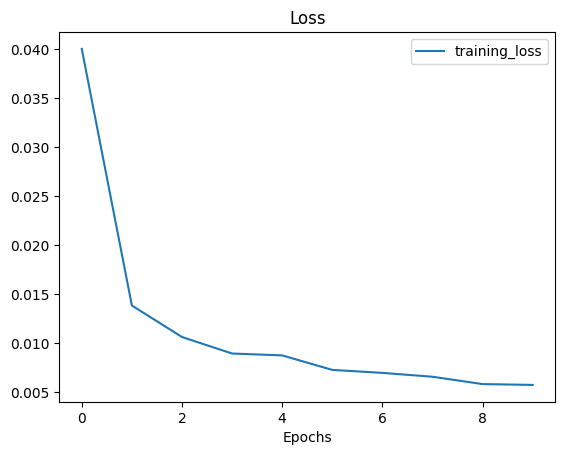

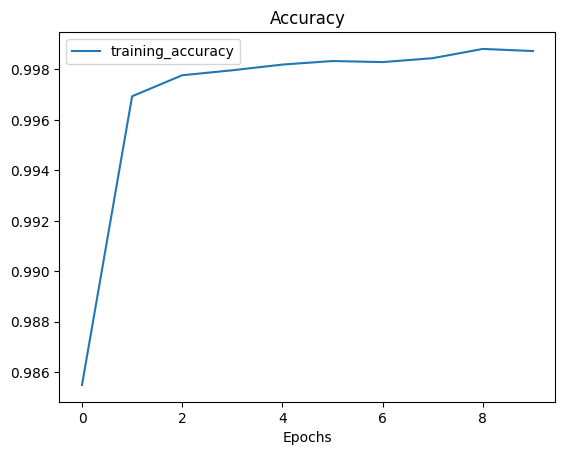

In [ ]:
plot_loss_curves(history4)

#conclusion

Task 1:-Prepare a complete data analysis report on the given data.

        univariant and bivariant analysis done on the data

Task 2:-Create a predictive model to classify whether a person is running or walking based on the given predictor variables.

        created 4 different models and checked the different accuracies of all models.

        found that the GRU model is performing well in prediccting the different classes.

        the prediction on the testing data is performing well when the window size is more than 1

